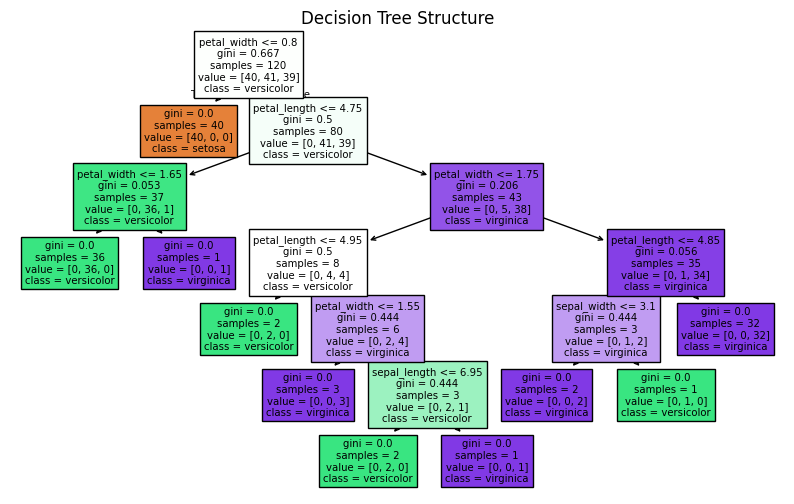

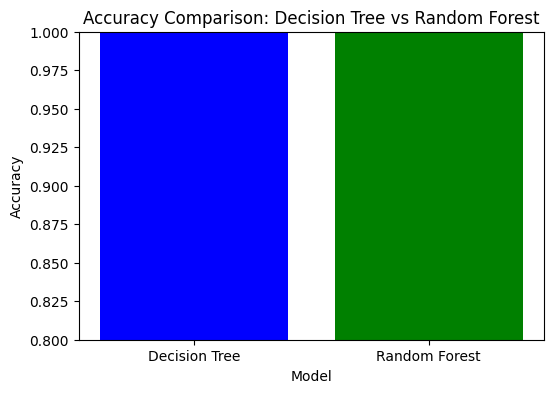

<ipython-input-6-552d5407a236>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X.columns, palette="viridis")


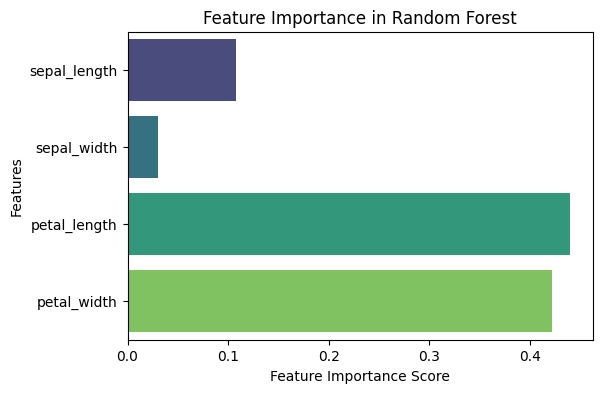

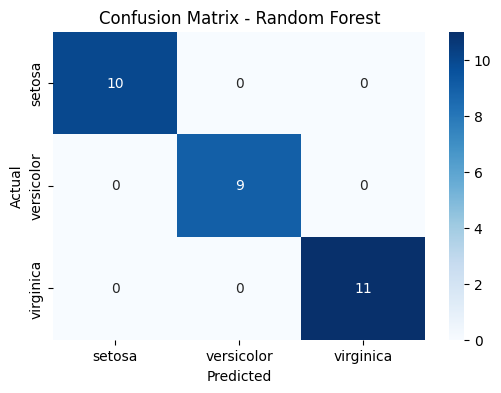

In [ ]:
# Install required libraries (Uncomment in Colab if needed)
# !pip install numpy pandas matplotlib scikit-learn seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Added for Confusion Matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
X = data.drop(columns=['species'])
y = data['species']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
dt_acc = accuracy_score(y_test, y_pred_dt)
rf_acc = accuracy_score(y_test, y_pred_rf)

# 1️ Decision Tree Visualization
plt.figure(figsize=(10, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.title("Decision Tree Structure")
plt.show()

# 2️ Accuracy Comparison Bar Chart
models = ['Decision Tree', 'Random Forest']
accuracy = [dt_acc, rf_acc]
plt.figure(figsize=(6,4))
plt.bar(models, accuracy, color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: Decision Tree vs Random Forest")
plt.ylim(0.8, 1.0)  # Adjust y-axis for better visualization
plt.show()

# 3️ Feature Importance Bar Plot (Random Forest)
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=feature_importance, y=X.columns, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

# 4️ Confusion Matrix Heatmap (Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
